In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv(r'F:\01. TOOLS\06. DATASETS\DS\store11.csv')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
print(data.head())

   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   08-11-16  11-11-16    Second Class    CG-12520   
1       2  CA-2016-152156   08-11-16  11-11-16    Second Class    CG-12520   
2       3  CA-2016-138688   12-06-16  16-06-16    Second Class    DV-13045   
3       4  US-2015-108966   11-10-15  18-10-15  Standard Class    SO-20335   
4       5  US-2015-108966   11-10-15  18-10-15  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798

In [6]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
data.shape

(9994, 21)

In [8]:
print("Number of Duplicated values: ", data.duplicated().sum())

Number of Duplicated values:  0


In [9]:
data.value_counts('Region')

Region
West       3203
East       2848
Central    2323
South      1620
dtype: int64

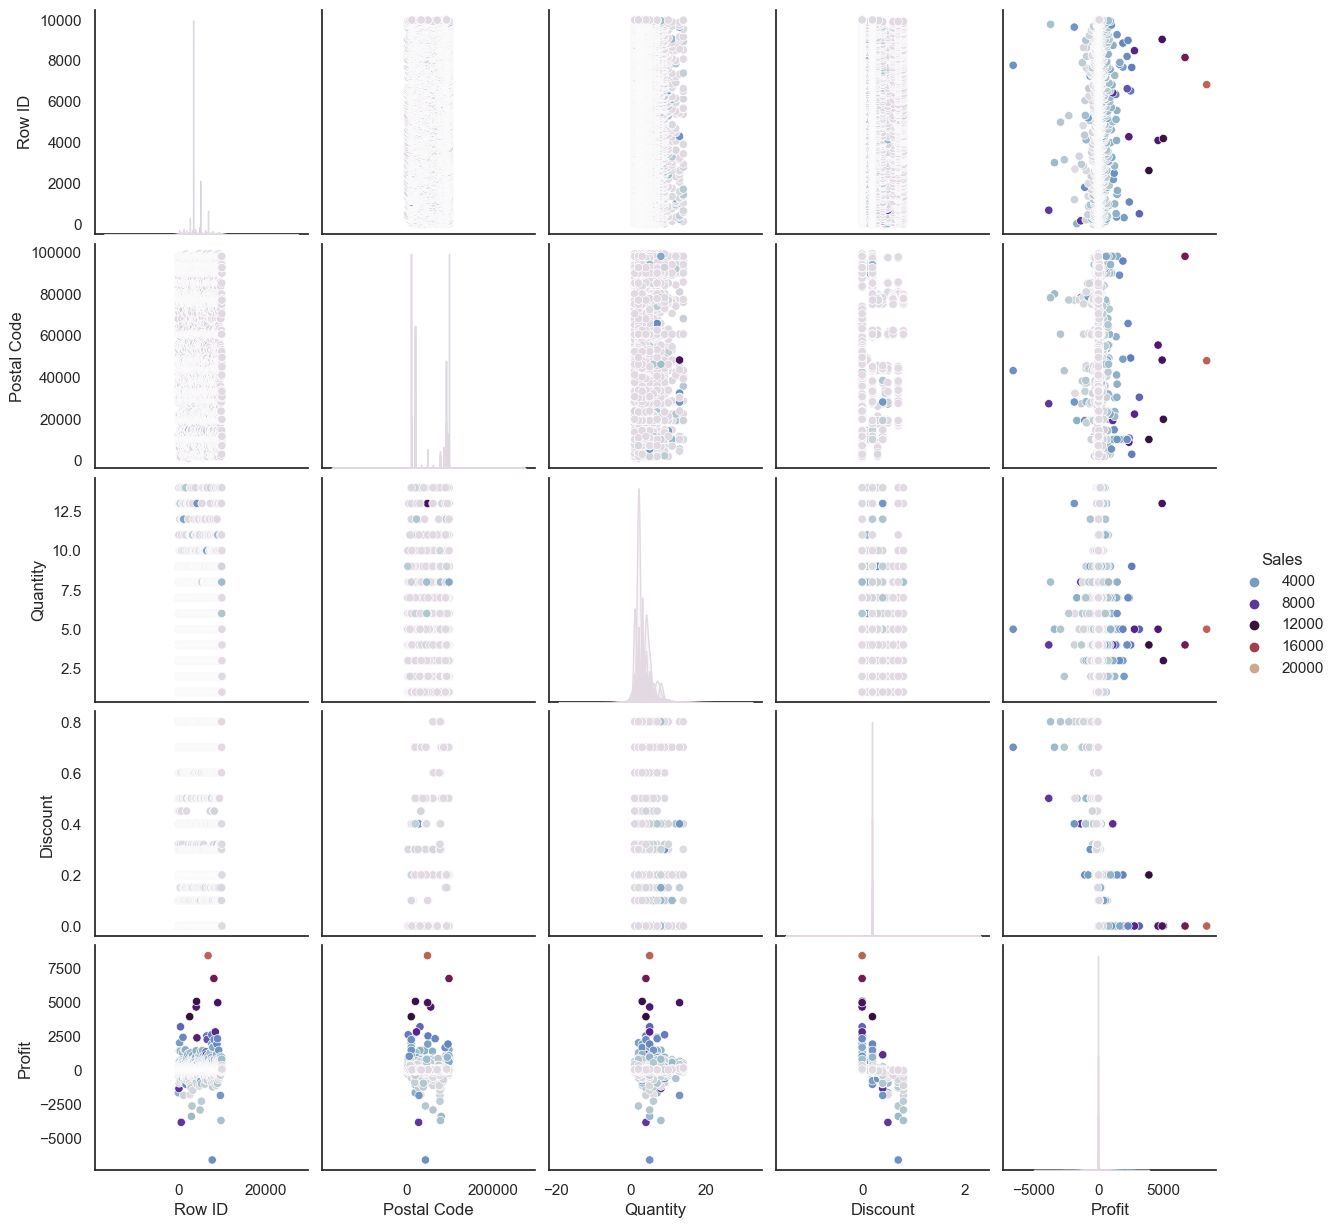

In [10]:
sns.pairplot(data, hue = 'Sales', palette = 'twilight')

In [11]:
data_p = data[["Region", "Sales"]]
data_p.value_counts("Region")
data_p = data_p.groupby(data_p["Region"]).sum("Sales")
data_p = data_p.sort_values(by = "Sales", ascending = False)
data_p

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


Text(0.5, 1.0, 'Region vs Sales')

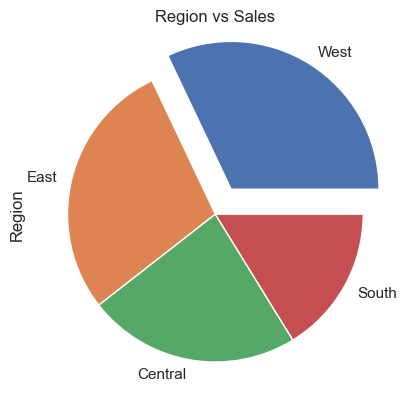

In [12]:
myexplode = [0.2, 0, 0, 0]
data['Region'].value_counts().plot(kind='pie', explode = myexplode)
plt.title('Region vs Sales')

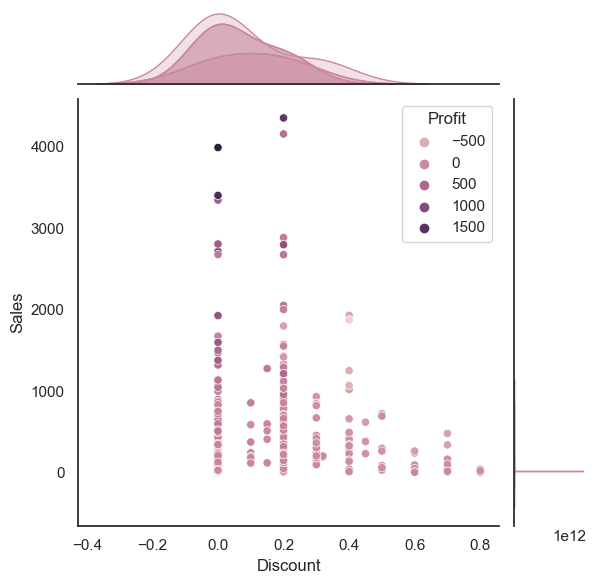

In [13]:
sns.jointplot(data= (data.sample(1000)), x = 'Discount', y = 'Sales', hue = 'Profit')

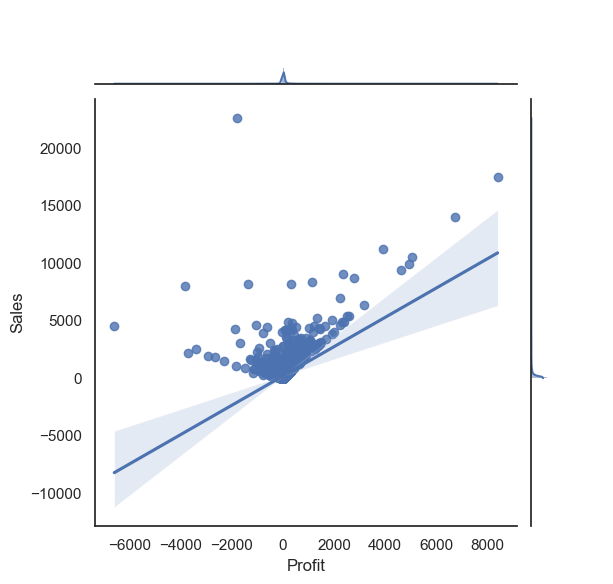

In [14]:
sns.jointplot(data = data, x = 'Profit', y = 'Sales', kind = 'reg')

<AxesSubplot: >

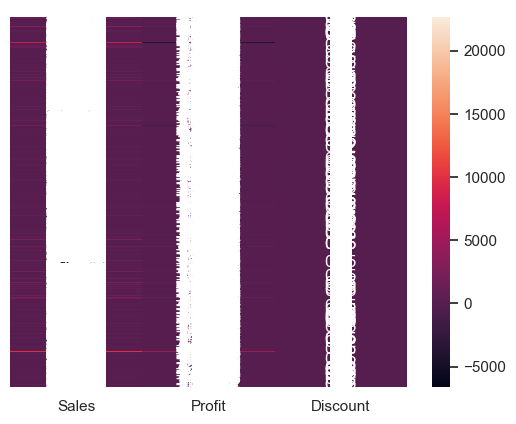

In [15]:
columns = data[['Sales', 'Profit', 'Discount']]

sns.heatmap(columns, annot=True, yticklabels = False)

In [17]:
maximum_sales = data[['City', 'Sales']]

maximum_sales = maximum_sales.groupby(data["City"]).sum("Sales")
maximum_sales.head()

maximum_sales = maximum_sales.sort_values(by = 'Sales', ascending = False)
ms = maximum_sales.head(5)
ms



,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


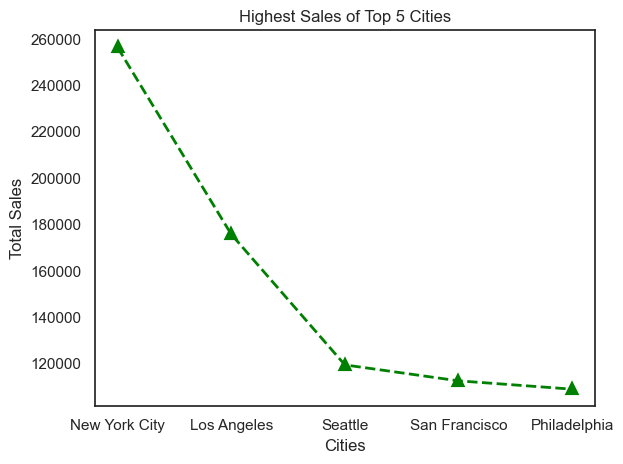

In [18]:
# plot of total sales of Top 5  Citie in Descending Order of Sales 

values = ms["Sales"]
plt.plot(values, scalex= True, color='green', linestyle='dashed',linewidth=2, marker = '^', markeredgewidth = 3)
plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.title('Highest Sales of Top 5 Cities')
plt.tight_layout()

In [19]:
maximum_sales_segment = data[['State', 'Sales']]
maximum_sales_segment.sort_values(by = ['Sales'], ascending=False)
max_state = maximum_sales_segment.value_counts(subset=['State'], normalize= False)

In [20]:
max_sales_state = maximum_sales_segment.groupby(data["State"]).sum("Sales")
max_sales_state = max_sales_state.sort_values(by = 'Sales', ascending = False)
mss = max_sales_state.head(5)

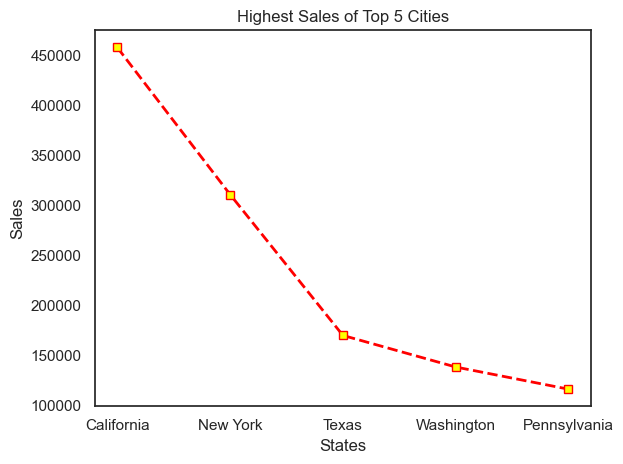

In [21]:
# plot of total sales of each state in alphabetical order

values = mss["Sales"]
plt.plot(values, scalex= True, color='red', linestyle='dashed',linewidth=2, marker = 's', markerfacecolor = 'yellow')
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Highest Sales of Top 5 Cities')
plt.tight_layout()